# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import MinMaxScaler
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.metrics.pairwise import euclidean_distances
import random
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from random import shuffle

In [0]:
link1='https://drive.google.com/open?id=1DHttMmrSbndc8GCOY1EqWnI22hGAx_um'

fluff, id = link1.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv') 
train_df = pd.read_csv('train.csv')

1DHttMmrSbndc8GCOY1EqWnI22hGAx_um


In [0]:
link2='https://drive.google.com/open?id=1YnI4006wUMHqVONToWWGaYqBCSl_BNu2'

fluff, id = link2.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test.csv') 
test_df = pd.read_csv('test.csv')

1YnI4006wUMHqVONToWWGaYqBCSl_BNu2


## Part 1 - Pairwise Correlations

In [0]:
# TODO: show visualization

Discuss most positive and negative correlations.

In [0]:
interesting_variables = ['GrLivArea', 'TotRmsAbvGrd', 'BedroomAbvGr', '1stFlrSF', 'OverallCond', 'OverallQual', 'LotArea','YearBuilt','FullBath','HalfBath','GarageCars','SalePrice']
len(interesting_variables)

12

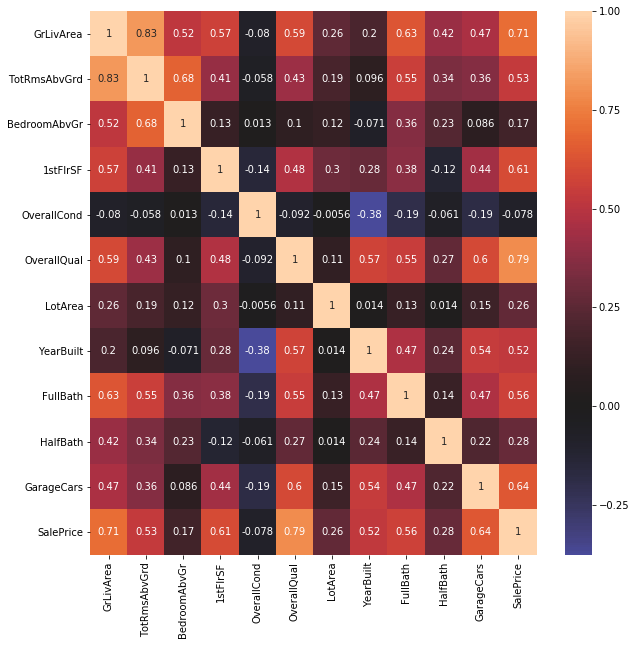

In [0]:
pearson_corr = train_df[interesting_variables].corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(pearson_corr,center=0,  annot=True)
plt.show();


In [0]:
pearson_corr.min().min()

-0.37598319560698873

In [0]:
pearson_corr

,GrLivArea,TotRmsAbvGrd,BedroomAbvGr,1stFlrSF,OverallCond,OverallQual,LotArea,YearBuilt,FullBath,HalfBath,GarageCars,SalePrice
GrLivArea,1.000000,0.825489,0.521270,0.566024,-0.079686,0.593007,0.263116,0.199010,0.630012,0.415772,0.467247,0.708624
TotRmsAbvGrd,0.825489,1.000000,0.676620,0.409516,-0.057583,0.427452,0.190015,0.095589,0.554784,0.343415,0.362289,0.533723
BedroomAbvGr,0.521270,0.676620,1.000000,0.127401,0.012980,0.101676,0.119690,-0.070651,0.363252,0.226651,0.086106,0.168213
1stFlrSF,0.566024,0.409516,0.127401,1.000000,-0.144203,0.476224,0.299475,0.281986,0.380637,-0.119916,0.439317,0.605852
OverallCond,-0.079686,-0.057583,0.012980,-0.144203,1.000000,-0.091932,-0.005636,-0.375983,-0.194149,-0.060769,-0.185758,-0.077856
OverallQual,0.593007,0.427452,0.101676,0.476224,-0.091932,1.000000,0.105806,0.572323,0.550600,0.273458,0.600671,0.790982
LotArea,0.263116,0.190015,0.119690,0.299475,-0.005636,0.105806,1.000000,0.014228,0.126031,0.014259,0.154871,0.263843
YearBuilt,0.199010,0.095589,-0.070651,0.281986,-0.375983,0.572323,0.014228,1.000000,0.468271,0.242656,0.537850,0.522897
FullBath,0.630012,0.554784,0.363252,0.380637,-0.194149,0.550600,0.126031,0.468271,1.000000,0.136381,0.469672,0.560664
HalfBath,0.415772,0.343415,0.226651,-0.119916,-0.060769,0.273458,0.014259,0.242656,0.136381,1.000000,0.219178,0.284108


The minimum correlation among these variable is between YearBuilt and OverallCond : -0.3759

The maximum correlation among these variable is between TotRmsAbvGrd and GrLivArea : 0.825
OverallQual and SalePrice also has high correlation value of 0.79

## Part 2 - Informative Plots

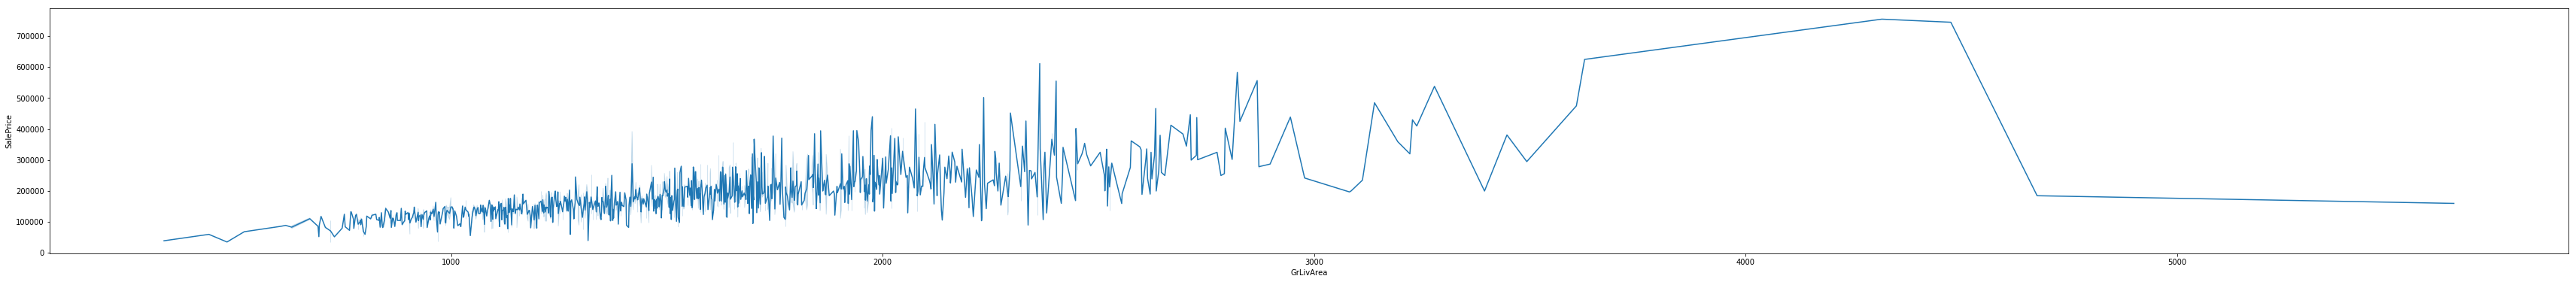

In [0]:
# TODO: code to generate Plot 1
plt.figure(figsize=(60, 6))
sns.lineplot(x='GrLivArea',y = 'SalePrice' ,data=train_df)

What interesting properties does Plot 1 reveal?

The first plot that I have created is a line chart between GrLivArea and SalePrice. I picked these two as from the heatmap constructed above we saw that they had a high Pearson correlation. Thus as expected, the line chart was more or less increased in one variable when the other variable was increased. But as we increase the size of the line chart, we notice some interesting things. Firstly, within small changes of GrLivArea there are quite a bit of fluctuations in the SalePrice. This implies that that there are other factors that impact the SalePrice. Furthermore, we notice that when GrLivArea increases to more than 4500, the SalePrice takes a sharp dive. But i think we should not consider it as a trend as there are just two data points.






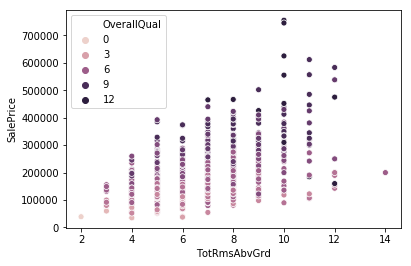

In [0]:
# TODO: code to generate Plot 2
sns.scatterplot(y=train_df['SalePrice'], x=train_df['TotRmsAbvGrd'],hue=train_df['OverallQual'])

What interesting properties does Plot 2 reveal?

The next chart that I have created is a scatterplot. Initially I had plotted SalePrice and TotRmsAbvGrd but that did not give me much information. So I also included another parameter OverallQual. With just TotRmsAbvGrd, we see that the SalePrice can vary quite a lot. Also for varying values of TotRmsAbvGrd, we see that the SalePrice can be the same(eg TotRmsAbvGrd = 5 or 9). The paramerter OverallQual provides a deep insight into this. With OverallQual we notice that with an increase in OverallQual there is an increase in SalePrice most of the times.



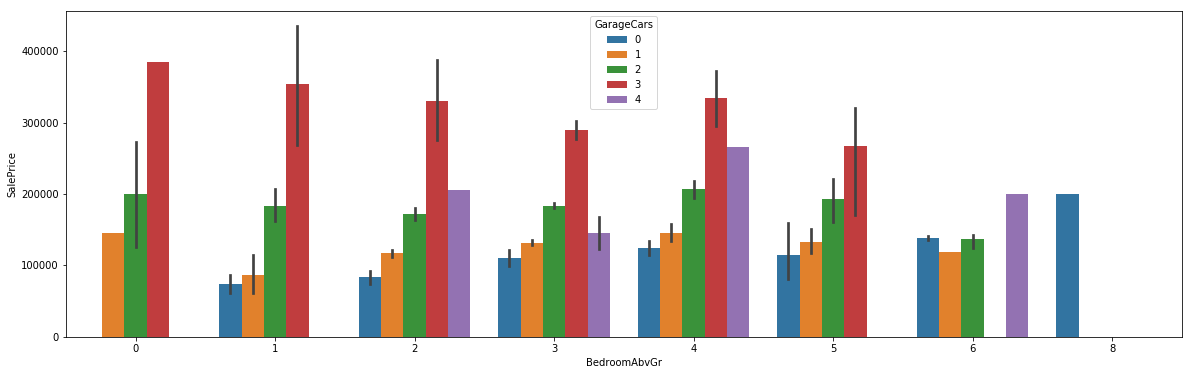

In [0]:
# TODO: code to generate Plot 3

plt.figure(figsize=(20, 6))
sns.barplot(x='BedroomAbvGr',y = 'SalePrice' , hue="GarageCars" , data=train_df)

What interesting properties does Plot 3 reveal?

In this plot we are using a barplot to plot the variables BedroomAbvGr, SalePrice, and GarageCars. Initially I had plotted SalePrice and BedroomAbvGr but that did not give me much information. So I also included another parameter GarageCars and it seems to provide nice insight. We can see that for almost every category of BedroomAbvGr, there is an increase in SalePrice when the number of GarageCars increase. Thus we can say that GarageCars seems to play an important role in predicting the SalePrice.

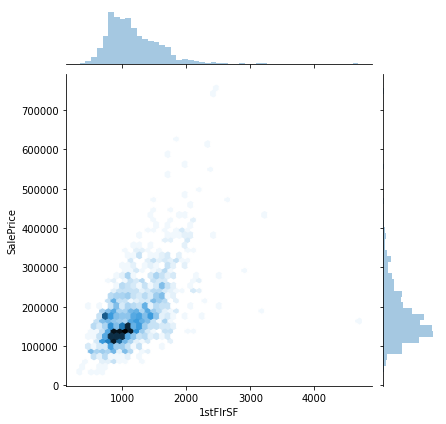

In [0]:
# TODO: code to generate Plot 4
sns.jointplot(x="1stFlrSF", y="SalePrice", data=train_df, kind="hex");

What interesting properties does Plot 4 reveal?

Here I have plotted a jointplot on 1stFlrSF and SalePrice. The data points of each parameter are represented in hexagonal shape. On the top and the right ends, distribution of each parameter is represented. Highly jointed values are dark while low density points are light. Thus we can see that we have high concentration where the values of 1stFlrSF is about 1000 and the SalePrice ie around 125000.

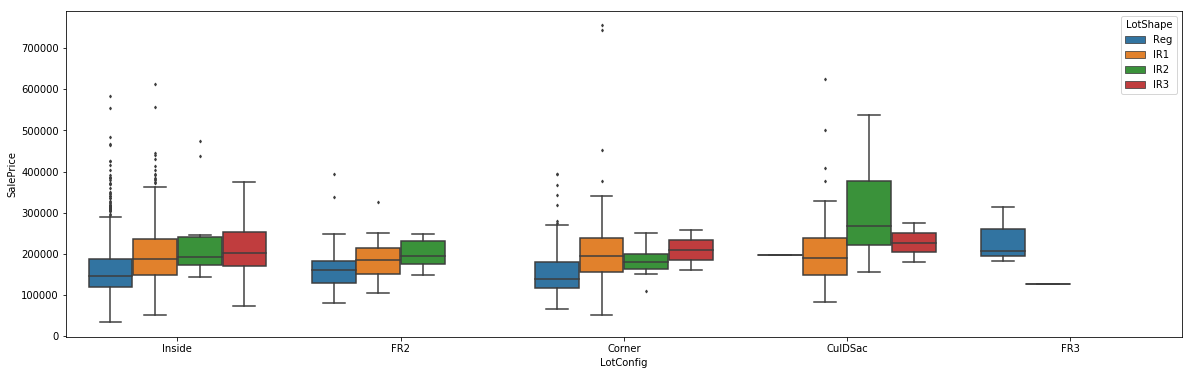

In [0]:
# TODO: code to generate Plot 5

plt.figure(figsize=(20, 6))
sns.boxplot(x="LotConfig", y="SalePrice",hue = "LotShape", data=train_df,fliersize=2.0)
#MSSubClass: The building class

What interesting properties does Plot 5 reveal?

The last figure I am plotting is of a boxplot and the parameters that I have used are LotConfig, SalePrice, and LotShape. It represents the various quartiles, inter quartile range(IQR), and also shows the outliers. As a generel trend we see that for a particular LotConfig, the median SalePrice increase when we move from LotShape values of Reg, IR1,IR2 to IR3. The intereting thing we notice about is when the LotConfig is CulDSac, the LotShape with IR2 seems to be more desirable. This can be seen as its IQR is more than IR1, moreover there are no outliers in that scenario.

## Part 3 - Handcrafted Scoring Function

In [0]:
# TODO: code for scoring function
desirable_variables = ['Id','OverallQual','TotalBsmtSF','GrLivArea', 'TotRmsAbvGrd', '1stFlrSF','FullBath','GarageArea','SalePrice']

desirability_df = train_df[desirable_variables].copy()
desirability_df.head()

,Id,OverallQual,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,1stFlrSF,FullBath,GarageArea,SalePrice
0,1,7,856,1710,8,856,2,548,208500
1,2,6,1262,1262,6,1262,2,460,181500
2,3,7,920,1786,6,920,2,608,223500
3,4,7,756,1717,7,961,1,642,140000
4,5,8,1145,2198,9,1145,2,836,250000


In [0]:
desirability_df['score'] =500 * desirability_df.OverallQual +  10 * desirability_df['TotalBsmtSF'] + 12 *desirability_df.GrLivArea + 500 * desirability_df.TotRmsAbvGrd + 8 * desirability_df['1stFlrSF']+400 * desirability_df.FullBath +5 * desirability_df.GarageArea



In [0]:
desirability_df.sort_values('score',ascending = False).head(10)


,Id,OverallQual,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,1stFlrSF,FullBath,GarageArea,SalePrice,score
1298,1299,10,6110,5642,12,4692,2,1418,160000,185230
523,524,10,3138,4676,11,3138,3,884,184750,128716
1182,1183,10,2396,4476,10,2411,3,813,745000,112225
691,692,10,2444,4316,10,2444,3,832,755000,111144
496,497,8,3200,3228,10,3228,3,546,430000,109490
440,441,10,3094,2402,10,2402,2,672,555000,93140
1373,1374,10,2633,2633,8,2633,2,804,466500,92810
1169,1170,10,1930,3627,10,1831,3,807,625000,92707
1353,1354,8,2033,3238,9,2053,2,666,410000,88240
798,799,9,1926,3140,11,1966,3,820,485000,87968


What is the ten most desirable houses?


Thus the ten most desirable houses are with the ids: 1299,524, 1183, 692, 497, 441, 1374, 1170, 1354,799.

As we can see, all of these data points have high OverallQual, and high values of TotalBsmtSF,	GrLivArea,	TotRmsAbvGrd,	1stFlrSF, and GarageArea. Thus we can see that just a couple of parameters are not enough to give it a high score. All of the features should provide best values to achieve a top score.  

In [0]:
desirability_df.sort_values('score',ascending = True).head(10)

,Id,OverallQual,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,1stFlrSF,FullBath,GarageArea,SalePrice,score
533,534,1,0,334,2,334,1,0,39300,8580
1100,1101,2,290,438,3,438,1,246,60000,15790
916,917,2,480,480,4,480,0,308,35311,18940
1321,1322,3,0,720,4,720,1,287,72500,19735
1218,1219,4,0,912,3,672,1,0,80500,20220
29,30,4,520,520,4,520,1,240,68500,21200
710,711,3,270,729,5,729,1,0,52000,21680
636,637,2,264,800,4,800,1,0,60000,22040
528,529,4,528,605,5,605,1,0,86000,22280
705,706,4,0,1092,7,372,2,0,55000,22380


What is the ten least desirable houses?

Thus the least desirable houses are with the ids: 534,1101,917,1322,1219,30,711,637,529,706.


As we can see, all of these data points have low OverallQual, and low values of TotalBsmtSF, GrLivArea,	TotRmsAbvGrd,	1stFlrSF, and GarageArea. Thus we can see that just a couple of parameters are not enough to give it a low score. All of the features should provide bad values to achieve the worst score. 

Describe your scoring function and how well you think it worked.


The variables I used to calculate the score are : OverallQual, TotalBsmtSF, GrLivArea, TotRmsAbvGrd, 1stFlrSF, FullBath, and GarageArea. To calcuate the score, I have taken a linear combination of these variables to create the final score for each data point.

I have used these variables as they seem to be the top desirable feaatures which you look in a house:

OverallQual : The overall quality should be very good. This would be a very important criteria for me. Thus, considering the order of the values I have it a very high weightage of 500

TotalBsmtSF : This feature is desirable and since its an area and is in greater order as compared to the previous feature, I have multiplied it with 10.

GrLivArea : This feature is important and since its an area and is in greater order as compared to the quality feature, I have multiplied it with 12.

TotRmsAbvGrd : The total rooms above the ground is an important criteria for me. . Thus I have it a very high weightage factor of 500.

1stFlrSF : The desireability score should incease when we have more area. But as compared to the general living area, it is less desirable.Thus I have it a very high weightage factor of 8.

FullBath: Full baths is a desirable feature and its in conjunction with the total rooms above ground. Thus I have it a weightage factor of 400.

GarageArea: Since more garage area compounds for car storage and other stuff. Thus considering the order of the values I have given it a weight factor of 5

To find out how well my scoring function performed, I calculated the pearson correlation between the score and SalePrice. It got a high value of 0.79. Thus we can conclude that the scoring function performs well.

In [0]:
desirability_df[['SalePrice','score']].corr(method='pearson')


,SalePrice,score
SalePrice,1.000000,0.798943
score,0.798943,1.000000


## Part 4 - Pairwise Distance Function

In [0]:
# TODO: code for distance function

from scipy.spatial.distance import cdist
distance_df = train_df[interesting_variables].copy()
manhattan_dist_mat = cdist(distance_df, distance_df)

In [0]:
partitioned_mats = np.argpartition(manhattan_dist_mat[random.randint(0,train_df.shape[0])], 5)
closest_neighbours = pd.DataFrame()
for i in partitioned_mats[:5]:
  closest_neighbours = closest_neighbours.append(train_df.iloc[i])

closest_neighbours

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,...,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1365,814.0,860.0,0.0,NaN,3.0,1Fam,TA,No,533.0,0.0,GLQ,Unf,1.0,0.0,Gd,281.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0.0,PConc,2.0,Typ,663.0,2.0,TA,RFn,TA,Attchd,2000.0,1674.0,1.0,...,Ex,2Story,1366.0,1.0,Gd,Lvl,Gtl,7500.0,Inside,NaN,Reg,0.0,60.0,FV,0.0,None,NaN,0.0,1.0,Somerst,96.0,5.0,7.0,Y,0.0,NaN,CompShg,Gable,Normal,216000.0,WD,0.0,Pave,7.0,814.0,AllPub,0.0,2000.0,2000.0,2010.0
851,1456.0,0.0,0.0,NaN,2.0,TwnhsE,TA,Gd,0.0,0.0,Unf,Unf,0.0,0.0,Gd,1273.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,NaN,TA,1.0,PConc,2.0,Typ,400.0,2.0,TA,Fin,TA,Attchd,2003.0,1456.0,0.0,...,Ex,1Story,852.0,1.0,Gd,Lvl,Gtl,3196.0,Inside,NaN,Reg,0.0,120.0,RL,40.0,BrkFace,NaN,0.0,5.0,Blmngtn,20.0,5.0,8.0,Y,0.0,NaN,CompShg,Gable,Normal,215000.0,WD,0.0,Pave,7.0,1273.0,AllPub,143.0,2003.0,2003.0,2006.0
1019,1506.0,0.0,0.0,NaN,2.0,TwnhsE,TA,Gd,16.0,0.0,GLQ,Unf,0.0,0.0,Gd,1346.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1.0,PConc,2.0,Typ,440.0,2.0,TA,Fin,TA,Attchd,2005.0,1506.0,0.0,...,Ex,1Story,1020.0,1.0,Gd,Lvl,Gtl,3013.0,Inside,43.0,Reg,0.0,120.0,RL,145.0,BrkFace,NaN,0.0,4.0,Blmngtn,20.0,5.0,7.0,Y,0.0,NaN,CompShg,Gable,Normal,213490.0,WD,0.0,Pave,6.0,1362.0,AllPub,142.0,2005.0,2005.0,2006.0
1060,1338.0,0.0,0.0,NaN,2.0,TwnhsE,TA,Mn,616.0,0.0,GLQ,Unf,1.0,0.0,Gd,722.0,Y,Norm,Norm,SBrkr,170.0,TA,Gd,CemntBd,CmentBd,NaN,NaN,0.0,PConc,2.0,Typ,582.0,2.0,TA,Fin,TA,Attchd,2001.0,1338.0,0.0,...,Ex,1Story,1061.0,1.0,Gd,Lvl,Gtl,4920.0,Inside,41.0,Reg,0.0,120.0,RL,0.0,None,NaN,0.0,4.0,StoneBr,0.0,5.0,8.0,Y,0.0,NaN,CompShg,Gable,Normal,213500.0,WD,0.0,Pave,6.0,1338.0,AllPub,0.0,2001.0,2001.0,2010.0
470,1502.0,0.0,0.0,NaN,1.0,TwnhsE,TA,Av,368.0,1120.0,GLQ,BLQ,1.0,0.0,Gd,0.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,HdBoard,HdBoard,NaN,NaN,0.0,PConc,1.0,Typ,528.0,2.0,TA,RFn,TA,Attchd,1985.0,1502.0,1.0,...,TA,1Story,471.0,1.0,Gd,Lvl,Gtl,6820.0,Corner,NaN,IR1,0.0,120.0,RL,0.0,None,NaN,0.0,6.0,StoneBr,54.0,5.0,8.0,Y,0.0,NaN,CompShg,Gable,Normal,212000.0,WD,140.0,Pave,4.0,1488.0,AllPub,0.0,1985.0,1985.0,2010.0


In [0]:
partitioned_mats = np.argpartition(manhattan_dist_mat[random.randint(0,train_df.shape[0])], 5)
closest_neighbours = pd.DataFrame()
for i in partitioned_mats[:5]:
  closest_neighbours = closest_neighbours.append(train_df.iloc[i])

closest_neighbours

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,...,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1120,1012.0,0.0,0.0,NaN,2.0,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1012.0,Y,Norm,Norm,FuseA,112.0,TA,TA,BrkFace,BrkFace,MnPrv,Gd,1.0,BrkTil,1.0,Typ,308.0,1.0,TA,Unf,TA,Detchd,1920.0,1012.0,0.0,...,TA,1Story,1121.0,1.0,TA,Bnk,Mod,8263.0,Inside,59.0,Reg,0.0,30.0,RM,0.0,None,NaN,0.0,5.0,IDOTRR,22.0,5.0,6.0,Y,0.0,NaN,CompShg,Gable,Normal,118400.0,WD,0.0,Pave,6.0,1012.0,AllPub,0.0,1920.0,1950.0,2007.0
609,1029.0,0.0,0.0,NaN,3.0,1Fam,TA,Mn,903.0,0.0,Rec,Unf,1.0,0.0,TA,126.0,Y,Feedr,Norm,SBrkr,39.0,Fa,TA,VinylSd,VinylSd,NaN,NaN,0.0,CBlock,1.0,Typ,261.0,1.0,TA,Unf,TA,Attchd,1961.0,1029.0,0.0,...,Gd,1Story,610.0,1.0,TA,Lvl,Gtl,7943.0,Inside,61.0,Reg,0.0,20.0,RL,192.0,BrkCmn,NaN,0.0,4.0,Sawyer,0.0,5.0,4.0,Y,0.0,NaN,CompShg,Gable,Normal,118500.0,WD,0.0,Pave,5.0,1029.0,AllPub,64.0,1961.0,1961.0,2007.0
1314,948.0,0.0,0.0,NaN,3.0,1Fam,TA,No,732.0,0.0,Rec,Unf,1.0,0.0,TA,216.0,Y,Norm,Norm,SBrkr,0.0,TA,TA,Wd Sdng,Wd Sdng,NaN,TA,1.0,CBlock,1.0,Typ,280.0,1.0,TA,Unf,TA,Detchd,1956.0,948.0,0.0,...,Ex,1Story,1315.0,1.0,TA,Lvl,Gtl,8190.0,Inside,60.0,Reg,0.0,20.0,RL,0.0,None,NaN,0.0,10.0,Edwards,36.0,6.0,4.0,Y,0.0,NaN,CompShg,Hip,Normal,119000.0,WD,0.0,Pave,5.0,948.0,AllPub,0.0,1954.0,1954.0,2007.0
575,832.0,384.0,0.0,NaN,2.0,1Fam,TA,No,442.0,0.0,Rec,Unf,0.0,0.0,TA,390.0,Y,Norm,Norm,SBrkr,102.0,TA,TA,MetalSd,MetalSd,NaN,NaN,0.0,CBlock,1.0,Typ,336.0,1.0,TA,Unf,TA,Detchd,1947.0,1216.0,0.0,...,TA,1.5Fin,576.0,1.0,TA,Lvl,Gtl,8480.0,Inside,80.0,Reg,0.0,50.0,RL,0.0,None,NaN,0.0,10.0,NAmes,0.0,5.0,5.0,Y,0.0,NaN,CompShg,Gable,Abnorml,118500.0,COD,0.0,Pave,6.0,832.0,AllPub,158.0,1947.0,1950.0,2008.0
9,1077.0,0.0,0.0,NaN,2.0,2fmCon,TA,No,851.0,0.0,GLQ,Unf,1.0,0.0,TA,140.0,Y,Artery,Artery,SBrkr,0.0,TA,TA,MetalSd,MetalSd,NaN,TA,2.0,BrkTil,1.0,Typ,205.0,1.0,TA,RFn,Gd,Attchd,1939.0,1077.0,0.0,...,Ex,1.5Unf,10.0,2.0,TA,Lvl,Gtl,7420.0,Corner,50.0,Reg,0.0,190.0,RL,0.0,None,NaN,0.0,1.0,BrkSide,4.0,6.0,5.0,Y,0.0,NaN,CompShg,Gable,Normal,118000.0,WD,0.0,Pave,5.0,991.0,AllPub,0.0,1939.0,1950.0,2008.0


How well does the distance function work? When does it do well/badly?



To calculate the distance function, I have used the manhttan distance function.

It performs poorly, when we the two properties are not really at close intervals. We can improve this by using an euclidian function or by using cosine distance function by first normalising the values. Moreover, this performs poorly on categorical data as well.

It would perform well when we normalize the data and use cosine distance function

## Part 5 - Clustering

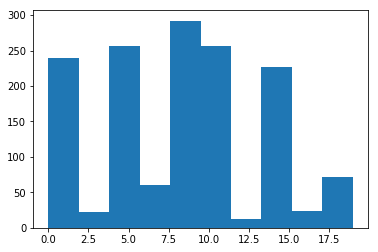

In [0]:
# TODO: code for clustering and visualization

K_clusters = KMeans(n_clusters=5).fit_predict(distance_df)
plt.hist(K_clusters)
plt.show()

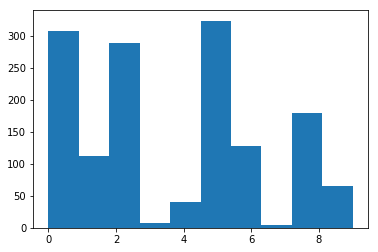

In [0]:
K_clusters = KMeans(n_clusters=10).fit_predict(distance_df)
plt.hist(K_clusters)
plt.show()

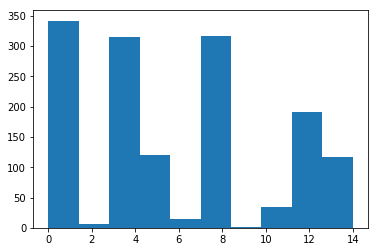

In [0]:
K_clusters = KMeans(n_clusters=15).fit_predict(distance_df)
plt.hist(K_clusters)
plt.show()

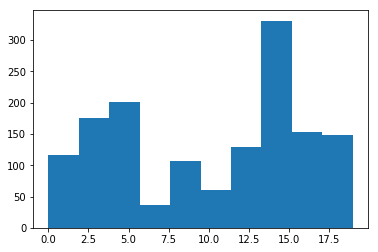

In [0]:
K_clusters = KMeans(n_clusters=20).fit_predict(distance_df)
plt.hist(K_clusters)
plt.show()

How well do the clusters reflect neighborhood boundaries? Write a discussion on what your clusters capture and how well they work.



For creating the clusters I have used the same set of intersting variable that we used in part 1 and part 4. They are 'GrLivArea', 'TotRmsAbvGrd', 'BedroomAbvGr', '1stFlrSF', 'OverallCond', 'OverallQual', LotArea', 'YearBuilt', 'FullBath', 'HalfBath', 'GarageCars', and 'SalePrice'

## Part 6 - Linear Regression

In [0]:
# TODO: code for linear regression

linear_variables= ['GrLivArea', 'TotRmsAbvGrd', 'BedroomAbvGr', '1stFlrSF', 'OverallCond', 'OverallQual']
linar_df = train_df[linear_variables].copy()
linear_output = train_df['SalePrice'].copy()
X_train, X_test, y_train, y_test = train_test_split(linar_df, linear_output, test_size=0.25, random_state=40)

In [0]:
linear_model = LinearRegression().fit(X_train, y_train)
linear_preds = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, linear_preds))
print("RMSE: %f" % (rmse))

RMSE: 34090.016782


In [0]:
linear_model.coef_

array([   50.63601087,  1793.20309086, -9005.1681318 ,    34.72268257,
        2108.54734453, 30078.35921598])

How well/badly does it work? Which are the most important variables?


After performing linear regresion on these selected features I got an RMSE value of 34090. Considering the large number of columns and categorical values that we have in our original traning set, I had expected the error to be very large. Thus I can say that the model performed a lot better than I expected. But, one could also argue that the features that I have selected have higher correlation than the other non-selected features. By finding out the coefficients of the variables after we fit it on the traning split data, we find that 'OverallQual' is the most important variable here.

## Part 7 - External Dataset

In [0]:
# TODO: code to import external dataset and test


link3='https://drive.google.com/open?id=1LLCtWh9gPhsWh4La7BFNSMnNMFL2zkS0'

fluff, id = link1.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AmesHousing.csv') 
externl_df = pd.read_csv('AmesHousing.csv')

1DHttMmrSbndc8GCOY1EqWnI22hGAx_um


In [0]:
linear_df = train_df[interesting_variables].copy()
linear_df_output = linear_df['SalePrice'].copy()
linear_df.drop('SalePrice', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(linear_df, linear_df_output, test_size=0.25, random_state=49)


linear_model_training = LinearRegression().fit(X_train, y_train)
linear_preds = linear_model_training.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, linear_preds))
print("RMSE: %f" % (rmse))

RMSE: 31664.236054


In [0]:
combined_df = train_df[interesting_variables].copy()
combined_df=combined_df.append(externl_df[interesting_variables])
combined_df_output = combined_df['SalePrice'].copy()
combined_df.drop('SalePrice', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(combined_df, combined_df_output, test_size=0.25, random_state=44)


linear_model_combined = LinearRegression().fit(X_train, y_train)
linear_preds = linear_model_combined.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, linear_preds))
print("RMSE: %f" % (rmse))

RMSE: 33286.075077


Describe the dataset and whether this data helps with prediction.


The external dataset was chosen from the google dataset. It is relatable to the dataset that we are currently using. First I calcualted the RMSE score on the liner regression model by using the interesting variables that we had used in the first question. Using this model we got an RMSE score of 31664. 

Next, i combined the external dataset with the given training dataset and applied linear regression on this combined dataset. Suprisingly the RMSE error increased on this combined dataset. 

## Part 8 - Permutation Test

In [0]:
# TODO: code for all permutation tests


ptest_variables = ['GrLivArea', 'TotRmsAbvGrd', 'BedroomAbvGr', '1stFlrSF', 'OverallCond', 'OverallQual','Id','YearRemodAdd','GarageYrBlt', 'ScreenPorch']
ptest_df = train_df[ptest_variables].copy()
ptest_df_output = train_df['SalePrice'].copy()



In [0]:
for p_var in ptest_variables:
  X_train, X_test, y_train, y_test = train_test_split(ptest_df[[p_var]], ptest_df_output, test_size=0.25, random_state=449)
  linear_model_training = LinearRegression().fit(X_train, y_train)
  linear_preds = linear_model_training.predict(X_test)
  rmse_actual = np.sqrt(mean_squared_error(np.log(y_test), np.log(linear_preds)))   
  p_test_counts=0
  for i in range(100):
        np.random.shuffle(y_test)
        np.random.shuffle(y_train)         
        linear_model_training_shuffled = LinearRegression().fit(X_train, y_train)
        linear_preds_shuffled = linear_model_training_shuffled.predict(X_test)
        rmse_shuffled = np.sqrt(mean_squared_error(np.log(y_test), np.log(linear_preds))) 
        if rmse_shuffled < rmse_actual:
                                p_test_counts=p_test_counts+1
                              
  print("Column: ",p_var," probability: ",p_test_counts/100)

Column:  GrLivArea  probability:  0.0
Column:  TotRmsAbvGrd  probability:  0.0
Column:  BedroomAbvGr  probability:  0.0
Column:  1stFlrSF  probability:  0.0
Column:  OverallCond  probability:  0.0
Column:  OverallQual  probability:  0.3
Column:  Id  probability:  0.92
Column:  YearRemodAdd  probability:  0.05
Column:  GarageYrBlt  probability:  0.68
Column:  ScreenPorch  probability:  0.72


Describe the results.


As we can see, the meaningful parameters have low p value and meningless paramerters have large p value

## Part 9 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/shourya17

Highest Rank: 2358

Score:0.13684

Number of entries: 2

INCLUDE IMAGE OF YOUR KAGGLE RANKING!


comment: I cant seem to upload the kaggle rank image. I am providing a shareable link of the same. Thanks! 

![ResultImage](https://drive.google.com/uc?export=view&id=1B1w30a3cm-FmAcqIUxlcE3SM1gqOrP3r)INCLUDE IMAGE OF YOUR KAGGLE RANKING

https://drive.google.com/open?id=16UsmY_WqlTLxJEvz_MiW0EzoyRm6SoTE

https://drive.google.com/open?id=1B1w30a3cm-FmAcqIUxlcE3SM1gqOrP3r

In [0]:

total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing Value', 'Percent'])
missing_data.head(10)

,Total Missing Value,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [0]:
total = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing Value', 'Percent'])
missing_data.head(10)

,Total Missing Value,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [0]:
garage_params = ['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']
train_df[garage_params].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,TA,TA
1,Attchd,1976.0,RFn,2,460,TA,TA
2,Attchd,2001.0,RFn,2,608,TA,TA
3,Detchd,1998.0,Unf,3,642,TA,TA
4,Attchd,2000.0,RFn,3,836,TA,TA


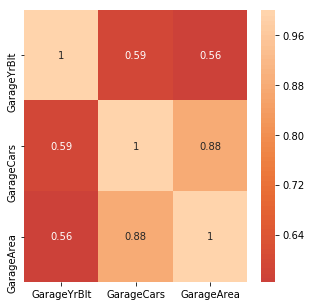

In [0]:
garage_nume = ['GarageYrBlt','GarageCars','GarageArea']
pearson_corr1 = train_df[garage_nume].corr(method='pearson')
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(pearson_corr1,center=0,  annot=True)
plt.show();


In [0]:
# thus drop garage cars as well

In [0]:
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

train_df_copy['label'] = 'train'
test_df_copy['label'] = 'test'

train_df_copy=train_df_copy.interpolate(method='polynomial', order=1)
test_df_copy=test_df_copy.interpolate(method='polynomial', order=1)
concat_df = pd.concat([train_df_copy , test_df_copy],sort=False)
columns_to_drop = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageCars','Id','SalePrice']
concat_df.drop(columns_to_drop, axis=1, inplace=True)
concat_df.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,label
1113,20,RL,70.0,18044,Pave,IR1,HLS,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,8,5,1986,1986,Gable,CompShg,WdShing,Plywood,None,0.0,Gd,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,279.0,279.0,GasA,Gd,Y,SBrkr,2726,0,0,2726,0.0,0.0,2,1,2,1,Gd,6,Typ,1,Attchd,1986.0,Fin,691.0,Gd,Gd,Y,216,64,169,0,0,228,0,8,2007,WD,Normal,test
316,30,RL,80.0,8480,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1945,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,BLQ,700.0,Unf,0.0,93.0,793.0,GasA,TA,Y,SBrkr,793,0,0,793,1.0,0.0,1,0,2,1,Fa,4,Typ,0,Detchd,1945.0,Unf,240.0,TA,TA,Y,0,0,0,0,0,0,0,8,2009,WD,Normal,test
1209,60,RL,96.0,11631,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,236.0,Gd,TA,PConc,Gd,TA,Av,Unf,0.0,Unf,0.0,1052.0,1052.0,GasA,Ex,Y,SBrkr,1052,1321,0,2373,0.0,0.0,2,1,4,1,Gd,9,Typ,1,BuiltIn,2004.0,Fin,632.0,TA,TA,Y,120,46,0,0,0,0,0,6,2006,New,Partial,test
72,60,RL,74.0,10141,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,40.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,832.0,832.0,GasA,Gd,Y,SBrkr,885,833,0,1718,0.0,0.0,2,1,3,1,TA,7,Typ,1,Attchd,1998.0,Fin,427.0,TA,TA,Y,0,94,0,0,291,0,0,12,2009,WD,Normal,train
218,20,RL,117.0,15262,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Hip,CompShg,VinylSd,VinylSd,BrkFace,470.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1557.0,Unf,0.0,643.0,2200.0,GasA,Ex,Y,SBrkr,2200,0,0,2200,1.0,0.0,2,1,3,1,Ex,8,Typ,1,Attchd,2003.0,Fin,685.0,TA,TA,Y,208,55,0,0,0,0,0,7,2009,WD,Normal,test


In [0]:
nan_columns=concat_df.columns[concat_df.isna().any()].tolist()
numerical_cols = [f for f in concat_df.columns if concat_df.dtypes[f] != 'object']
containNumNans = list(set(nan_columns) & set(numerical_cols))

In [0]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(concat_df[numerical_cols])
concat_df.loc[:,numerical_cols] = scaled_values

In [0]:
concat_df = pd.get_dummies(concat_df)
concat_df.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,label_test,label_train
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.109641,0.413559,0.0,0.259231,0.333333,0.0,0.50,0.5,0.375,0.333333,0.461538,0.00,0.346154,0.368280,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.194917,0.000000,0.0,0.174830,0.000000,0.5,0.50,0.0,0.375,0.333333,0.307692,0.25,0.259615,0.309140,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.123083,0.419370,0.0,0.273549,0.333333,0.0,0.50,0.5,0.375,0.333333,0.307692,0.25,0.339744,0.408602,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.131695,0.366102,0.0,0.260550,0.333333,0.0,0.25,0.0,0.375,0.333333,0.384615,0.25,0.330128,0.431452,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,0.090909,0.00,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.170342,0.509927,0.0,0.351168,0.333333,0.0,0.50,0.5,0.500,0.333333,0.538462,0.25,0.336538,0.561828,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [0]:
train_df_final = concat_df.loc[concat_df['label_train'] == 1]
test_df_final = concat_df.loc[concat_df['label_test'] == 1]

'''
col_drops = ['label_test','label_train']
train_df_final.drop(col_drops, axis=1, inplace=True)
test_df_final.drop(col_drops, axis=1, inplace=True)
'''
output = train_df['SalePrice']


In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_df_final, output, test_size=0.25, random_state=42)

In [0]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.01,max_depth = 5, alpha = 10, n_estimators = 40)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:42:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 136641.157155


In [0]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=7000, learning_rate=0.01, max_depth=10, max_features='sqrt',min_samples_leaf=5, min_samples_split=15, loss='ls')
GB_model = GBest.fit(X_train, y_train)
preds = GBest.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 24703.223138


In [0]:
preds_test = GBest.predict(test_df_final)
submiission = {"Id" : test_df.Id.values, "SalePrice" : preds_test}
submiissio_df = pd.DataFrame(submiission)
submiissio_df.to_csv("FirstSubmission.csv", index = False)